# **IMPORT LIBRARIES**

In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from scipy.stats import randint

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [2]:
features = pd.read_csv("../data/paris_lille/geometric_features.csv")

X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

# **BASELINE RANDOM FOREST**

In [3]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.800     0.857     0.828        14
           Bench      1.000     1.000     1.000         1
    Bicycle Rack      1.000     0.600     0.750         5
Bicycle Terminal      1.000     1.000     1.000         5
         Bollard      0.948     0.986     0.967        74
        Building      0.846     1.000     0.917        11
           Chair      0.500     1.000     0.667         1
Distribution Box      0.800     0.667     0.727         6
      Floor Lamp      0.963     0.929     0.945        28
          Island      1.000     0.800     0.889         5
Lighting Console      0.941     0.941     0.941        34
        Low Wall      1.000     0.833     0.909        18
         Mailbox      0.000     0.000     0.000         1
           Meter      0.000     0.000     0.000         2
      Mobile Car      0.750     0.300     0.429        10
         Natural      0.886     0.939     0.912        66
  Parked Bicy

# **HYPERPARAMETER TUNING**

In [5]:
model = RandomForestClassifier()

n_estimators = randint(100,2000)
max_features = ['auto', 'sqrt']
max_depth = randint(10,100)
min_samples_split = randint(1,10)
min_samples_leaf = randint(1,5)
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [6]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
random_search = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=cv, param_distributions=params_grid, scoring='f1_micro')
search_results = random_search.fit(X_train, y_train)

In [7]:
search_results.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1490)

In [8]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.800     0.857     0.828        14
           Bench      0.500     1.000     0.667         1
    Bicycle Rack      1.000     1.000     1.000         5
Bicycle Terminal      1.000     1.000     1.000         5
         Bollard      0.973     0.986     0.980        74
        Building      0.917     1.000     0.957        11
           Chair      0.500     1.000     0.667         1
Distribution Box      0.667     0.333     0.444         6
      Floor Lamp      1.000     0.964     0.982        28
          Island      1.000     0.400     0.571         5
Lighting Console      0.914     0.941     0.928        34
        Low Wall      0.938     0.833     0.882        18
         Mailbox      0.000     0.000     0.000         1
           Meter      0.000     0.000     0.000         2
      Mobile Car      0.600     0.300     0.400        10
         Natural      0.875     0.955     0.913        66
  Parked Bicy

# **CONFUSION MATRIX**

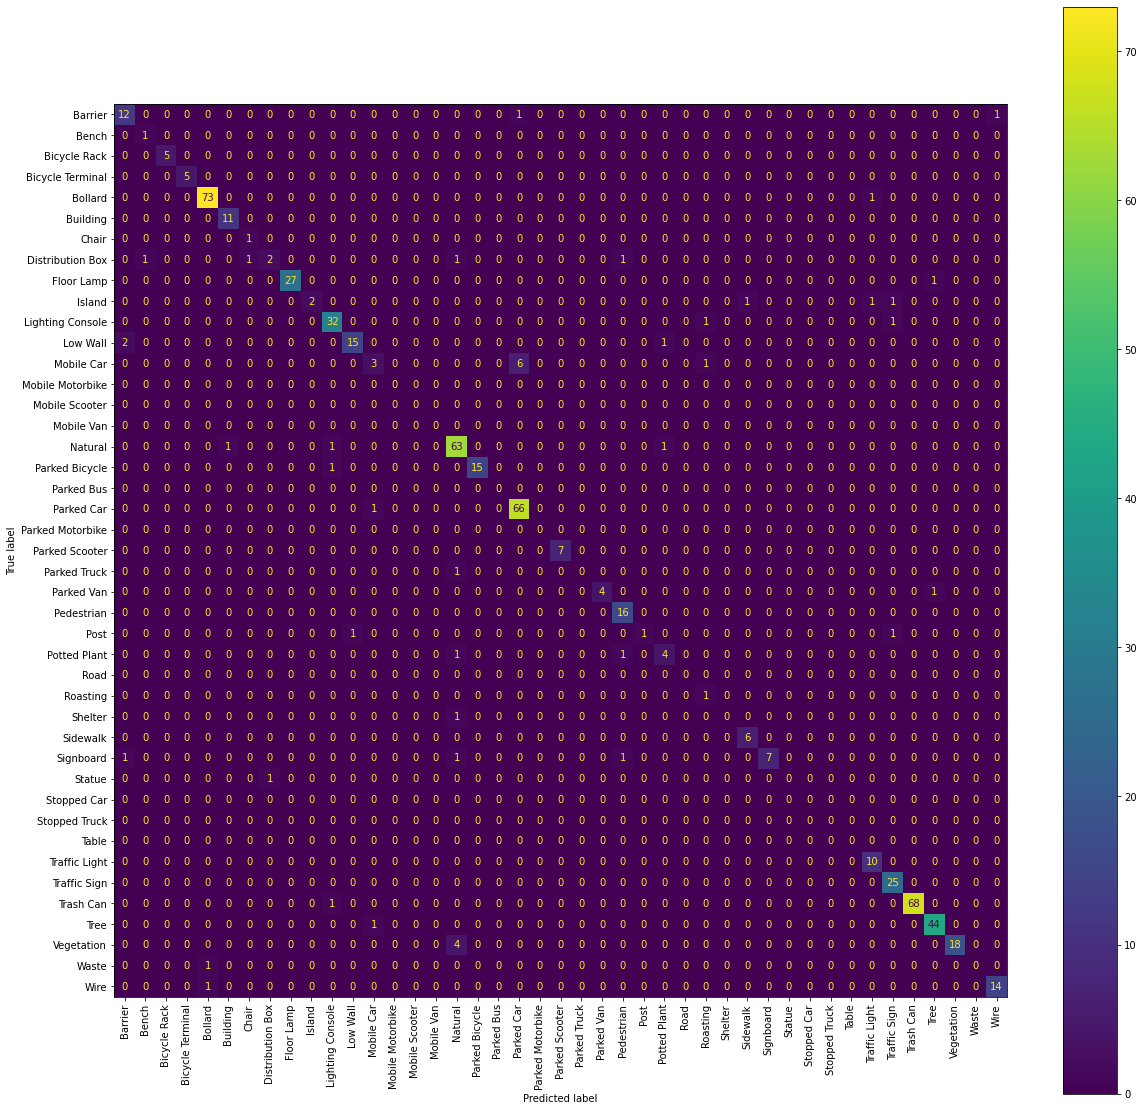

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_randomforest.png', dpi=600)

# **FEATURE IMPORTANCE**

In [10]:
importance = best_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05533
Feature: 1, Score: 0.04567
Feature: 2, Score: 0.09315
Feature: 3, Score: 0.06863
Feature: 4, Score: 0.16465
Feature: 5, Score: 0.05167
Feature: 6, Score: 0.05497
Feature: 7, Score: 0.15478
Feature: 8, Score: 0.31116


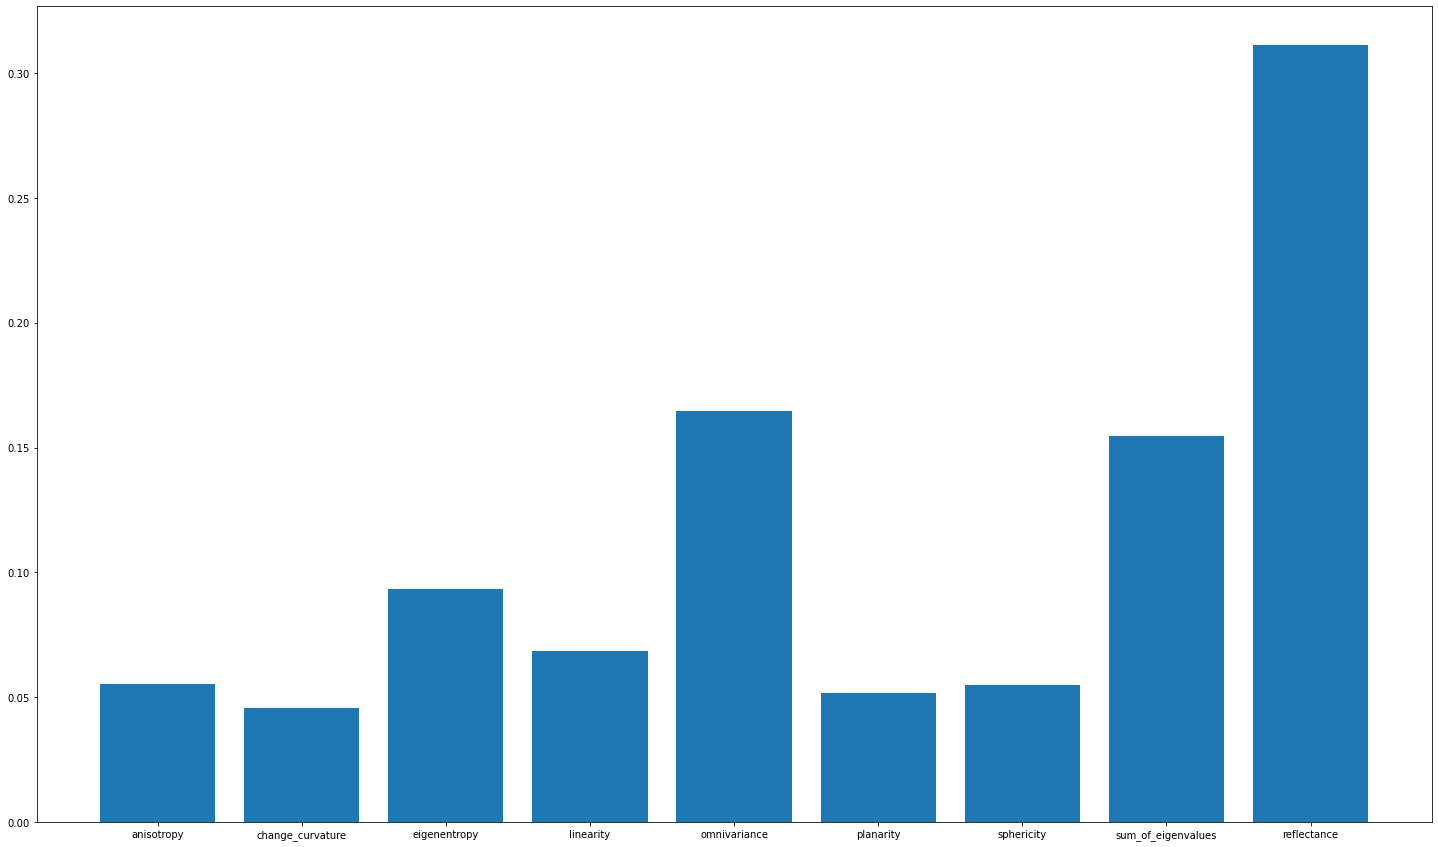

In [11]:
plt.figure(figsize=(25,15))
plt.bar( range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.xticks(range(len(best_model.feature_importances_)), X.columns)
plt.savefig('featureimportance_randomforest.png', dpi=600)
plt.show()